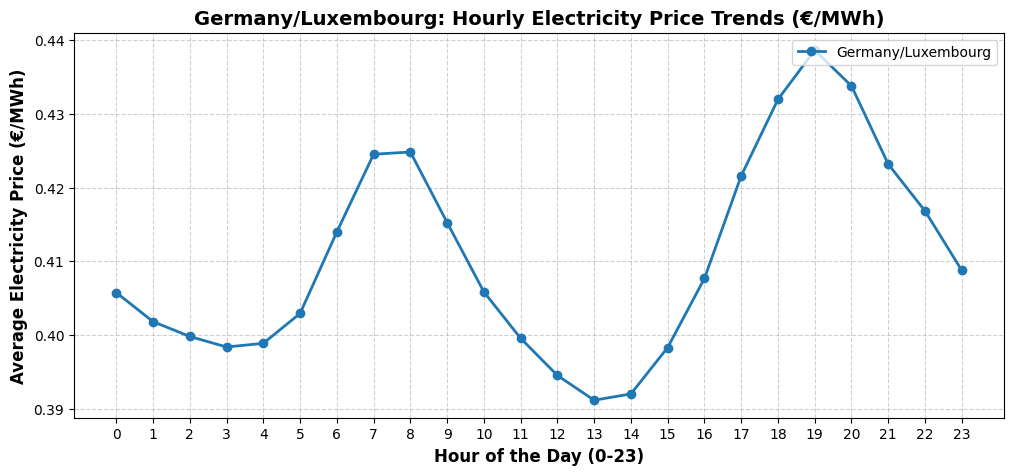

Plot saved: c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\eda-analysis\..\plots\electricity_hourly_trends_GER_LUX.png


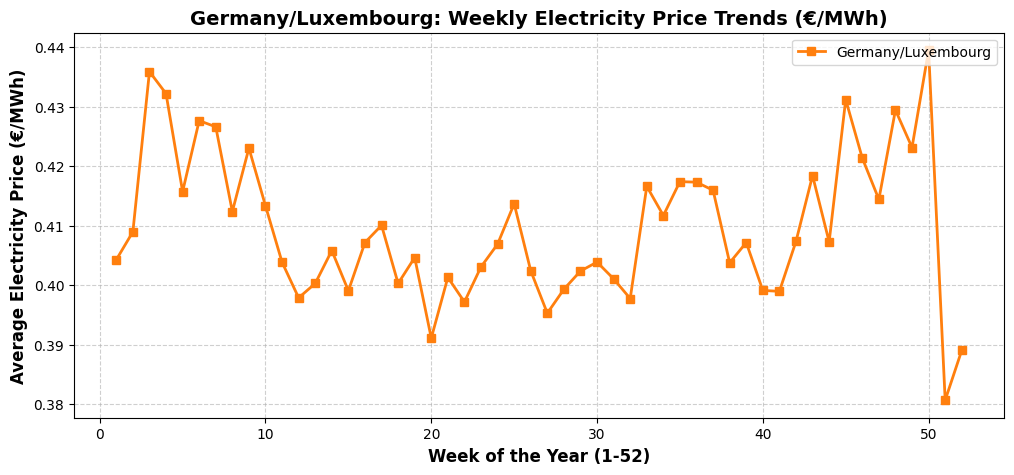

Plot saved: c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\eda-analysis\..\plots\electricity_weekly_trends_GER_LUX.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "../data/refined_files")
PLOTS_DIR = os.path.join(BASE_DIR, "..", "plots")

# Load dataset
file_path = os.path.join(DATA_DIR, "refined_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv")
df = pd.read_csv(file_path, delimiter=",", low_memory=False)

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"])

# Extract time components
df["Hour"] = df["Start date"].dt.hour
df["Week"] = df["Start date"].dt.isocalendar().week.astype(int)

# Ensure the target column is numeric
price_col = "Germany/Luxembourg [€/MWh] Original resolutions"
df[price_col] = pd.to_numeric(df[price_col], errors="coerce")

# Drop NaN values
df = df.dropna(subset=[price_col])

# Compute hourly and weekly averages
hourly_prices = df.groupby("Hour")[price_col].mean()
weekly_prices = df.groupby("Week")[price_col].mean().sort_index()

# --- Plot Hourly Trends ---
plt.figure(figsize=(12, 5))
plt.plot(hourly_prices.index, hourly_prices, label="Germany/Luxembourg", color="#1f77b4", marker="o", linestyle="-", linewidth=2, markersize=6)
plt.xlabel("Hour of the Day (0-23)", fontsize=12, fontweight="bold")
plt.ylabel("Average Electricity Price (€/MWh)", fontsize=12, fontweight="bold")
plt.title("Germany/Luxembourg: Hourly Electricity Price Trends (€/MWh)", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
hourly_plot_path = os.path.join(PLOTS_DIR, "electricity_hourly_trends_GER_LUX.png")
plt.savefig(hourly_plot_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"Plot saved: {hourly_plot_path}")

# --- Plot Weekly Trends ---
plt.figure(figsize=(12, 5))
plt.plot(weekly_prices.index, weekly_prices, label="Germany/Luxembourg", color="#ff7f0e", marker="s", linestyle="-", linewidth=2, markersize=6)
plt.xlabel("Week of the Year (1-52)", fontsize=12, fontweight="bold")
plt.ylabel("Average Electricity Price (€/MWh)", fontsize=12, fontweight="bold")
plt.title("Germany/Luxembourg: Weekly Electricity Price Trends (€/MWh)", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
weekly_plot_path = os.path.join(PLOTS_DIR, "electricity_weekly_trends_GER_LUX.png")
plt.savefig(weekly_plot_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Plot saved: {weekly_plot_path}")
